In [32]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [37]:
def create_data(n):
 x1 = array([i/100+uniform(-1,3) for i in range(n*27)]).reshape(n*27,1)
 x2 = array([i/100+uniform(-3,5)+2 for i in range(n*27)]).reshape(n*27,1)
 x3 = array([i/100+uniform(-6,5)-3 for i in range(n*27)]).reshape(n*27,1)

 y1= [x1[i]-x2[i]+x3[i]+uniform(-2,2) for i in range(n)]
 y2= [x1[i]+x2[i]-x3[i]+5+uniform(-1,3) for i in range(n)]
 X = hstack((x1, x2, x3))
 Y = hstack((y1, y2))
 return X, Y

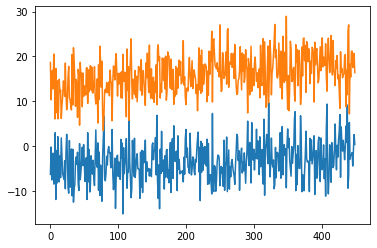

In [38]:
X, Y = create_data(n=450)

plt.plot(Y)
plt.show()

In [39]:
X = X.reshape(450, 9, 9, 1)
X.shape

(450, 9, 9, 1)

In [40]:
print("X:", X.shape, "Y:", Y.shape)

in_dim = X.shape[1:]
out_dim = Y.shape[1]

print(in_dim, out_dim)

X: (450, 9, 9, 1) Y: (450, 2)
(9, 9, 1) 2


In [36]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(2, 2), activation="relu", input_shape=in_dim))
model.add(Dense(32, activation="relu"))
model.add(Dense(out_dim))
model.compile(loss="mse", optimizer="adam")

NameError: name 'Conv2D' is not defined

In [42]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=in_dim))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(out_dim, activation='linear'))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 7, 7, 32)          320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 23,106
Trainable params: 23,106
Non-trainable params: 0
__________________________________________________

In [44]:
model.compile(loss="mse", optimizer="adam")

In [45]:
xtrain, xtest, ytrain, ytest=train_test_split(X, Y, test_size=0.15)

In [51]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((382, 9, 9, 1), (68, 9, 9, 1), (382, 2), (68, 2))

In [49]:
model.fit(xtrain, ytrain, epochs=1000)

Epoch 1/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.8551
Epoch 2/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.4335
Epoch 3/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.5737
Epoch 4/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.8764
Epoch 5/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.9699
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.8876
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: 5.2559
Epoch 8/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.8446
Epoch 9/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.4647
Epoch 10/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.3327
Epoch 11/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.2571
Epoch 12/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.3370
Epoch 13/1000
12/12 [====

12/12 [==============================] - 0s 2ms/step - loss: 3.0267
Epoch 102/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.7900
Epoch 103/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.5460
Epoch 104/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.5539
Epoch 105/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.1682
Epoch 106/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.1532
Epoch 107/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.1340
Epoch 108/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.1580
Epoch 109/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.3283
Epoch 110/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.4782
Epoch 111/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.3581
Epoch 112/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.5403
Epoch 113/1000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 1.3771
Epoch 200/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.2810
Epoch 201/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.4249
Epoch 202/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.6718
Epoch 203/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.6634
Epoch 204/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.5338
Epoch 205/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.6986
Epoch 206/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.9199
Epoch 207/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.7639
Epoch 208/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.5545
Epoch 209/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.3879
Epoch 210/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.3198
Epoch 211/1000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 0.8488
Epoch 298/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.9082
Epoch 299/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.3115
Epoch 300/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.1991
Epoch 301/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.9121
Epoch 302/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.8807
Epoch 303/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.8758
Epoch 304/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.1274
Epoch 305/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.1091
Epoch 306/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.4419
Epoch 307/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.4974
Epoch 308/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.4990
Epoch 309/1000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 0.5922
Epoch 396/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5722
Epoch 397/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5246
Epoch 398/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5547
Epoch 399/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5449
Epoch 400/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5950
Epoch 401/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5636
Epoch 402/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6176
Epoch 403/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6566
Epoch 404/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5073
Epoch 405/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4567
Epoch 406/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4221
Epoch 407/1000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 0.2954
Epoch 494/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.3752
Epoch 495/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.3486
Epoch 496/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4977
Epoch 497/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5974
Epoch 498/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5147
Epoch 499/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4969
Epoch 500/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.3817
Epoch 501/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2798
Epoch 502/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2358
Epoch 503/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2463
Epoch 504/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2259
Epoch 505/1000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 5.5237
Epoch 592/1000
12/12 [==============================] - 0s 2ms/step - loss: 6.2482
Epoch 593/1000
12/12 [==============================] - 0s 2ms/step - loss: 5.4984
Epoch 594/1000
12/12 [==============================] - 0s 2ms/step - loss: 3.7056
Epoch 595/1000
12/12 [==============================] - 0s 2ms/step - loss: 3.0676
Epoch 596/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.5750
Epoch 597/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.1669
Epoch 598/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.9550
Epoch 599/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.8372
Epoch 600/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.6325
Epoch 601/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.8392
Epoch 602/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.6594
Epoch 603/1000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 0.2650
Epoch 690/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2297
Epoch 691/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1687
Epoch 692/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1625
Epoch 693/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1473
Epoch 694/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1871
Epoch 695/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2516
Epoch 696/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2465
Epoch 697/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2370
Epoch 698/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.3073
Epoch 699/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2373
Epoch 700/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2009
Epoch 701/1000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 0.4395
Epoch 788/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.5074
Epoch 789/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.8660
Epoch 790/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.6912
Epoch 791/1000
12/12 [==============================] - 0s 2ms/step - loss: 1.1140
Epoch 792/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.5009
Epoch 793/1000
12/12 [==============================] - 0s 2ms/step - loss: 3.4834
Epoch 794/1000
12/12 [==============================] - 0s 2ms/step - loss: 6.5800
Epoch 795/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.9289
Epoch 796/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.9212
Epoch 797/1000
12/12 [==============================] - 0s 2ms/step - loss: 5.3472
Epoch 798/1000
12/12 [==============================] - 0s 2ms/step - loss: 6.7870
Epoch 799/1000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 0.2648
Epoch 886/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 887/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2595
Epoch 888/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2754
Epoch 889/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2311
Epoch 890/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2347
Epoch 891/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2033
Epoch 892/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2539
Epoch 893/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2282
Epoch 894/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2278
Epoch 895/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2081
Epoch 896/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1979
Epoch 897/1000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 0.1494
Epoch 984/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1559
Epoch 985/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1544
Epoch 986/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1211
Epoch 987/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0957
Epoch 988/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0930
Epoch 989/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1277
Epoch 990/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1223
Epoch 991/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1215
Epoch 992/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1272
Epoch 993/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.4115
Epoch 994/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.7446
Epoch 995/1000
12/1

In [50]:
ypred = model.predict(xtest)
print("y1 MSE:%.4f" % mean_squared_error(ytest[:,0], ypred[:,0])) 

print("y2 MSE:%.4f" % mean_squared_error(ytest[:,1], ypred[:,1]))

y1 MSE:44.6741
y2 MSE:45.1676


In [52]:
ypred

array([[  0.37970084,   8.525037  ],
       [ -2.9859247 ,   9.898156  ],
       [  6.386635  ,   8.852176  ],
       [ -2.479657  ,  23.174206  ],
       [ -5.7629237 ,  25.54612   ],
       [ -1.1557788 ,  18.184837  ],
       [  1.516857  ,   9.319324  ],
       [ -4.686733  ,  19.56968   ],
       [ -1.9389151 ,  17.344479  ],
       [ -5.4936705 ,  20.77145   ],
       [ -2.8927653 ,  13.866759  ],
       [ -4.8580008 ,  13.493125  ],
       [ -2.8585167 ,  12.336019  ],
       [ -7.4603114 ,  19.766891  ],
       [ -9.498341  ,  23.289013  ],
       [ -7.000987  ,  17.55919   ],
       [ -8.289514  ,  17.036697  ],
       [  2.3616655 ,  12.295483  ],
       [ -5.0849094 ,  21.678072  ],
       [  7.155448  ,   7.8396506 ],
       [ -2.1778116 ,  15.826422  ],
       [ -3.4409673 ,  13.137917  ],
       [ -0.16662343,  16.179607  ],
       [ -3.330601  ,  17.880686  ],
       [ -4.2323775 ,  10.1452265 ],
       [-13.123301  ,  18.759638  ],
       [ -1.7671973 ,  17.200714  ],
 

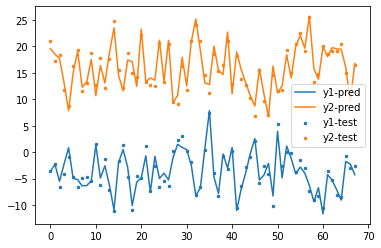

In [20]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest[:,0],  s=6, label="y1-test")
plt.plot(x_ax, ypred[:,0], label="y1-pred")
plt.scatter(x_ax, ytest[:,1],  s=6, label="y2-test")
plt.plot(x_ax, ypred[:,1], label="y2-pred")
plt.legend()
plt.show()